In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

In [2]:
#import data
X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')
columns = X_train.columns

print(X_train.shape)
print(y_train.shape)

sc= StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

columns = X_train.columns

(85751, 8)
(85751, 1)


In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_std, y_train, test_size=0.3, random_state=0)

In [4]:
print('#Training data  : ', X_train.shape[0])
print('#Validation data: ', X_valid.shape[0])
print('#Testing data   : ', X_test.shape[0])
print('Class labels    : ', np.unique(y_train))

#Training data  :  60025
#Validation data:  25726
#Testing data   :  36751
Class labels    :  [0 1]


<font size='5'>**↓LASSO using all 8 features, α= 0.010 gives the best accuracy↓**</font><br>
<font size='4'>**ps. y is predicted by round() to 1 or 0**</font>

In [5]:
from sklearn.metrics import accuracy_score
for a in [0.001, 0.01,0.1, 1, 10]:
    lr_rg = Lasso(alpha=a)
    lr_rg.fit(X_train, y_train)
    lr_rg.fit(X_valid, y_valid)

    y_train_pred = lr_rg.predict(X_train).round()
    y_valid_pred = lr_rg.predict(X_valid).round()
    y_valid = np.squeeze(y_valid)

    print('[alpha= %.3f]'% a)
    print('Misclassified samples: %d' % (y_valid != y_valid_pred).sum())
    print('Accuracy: %.2f\n' % accuracy_score(y_valid, y_valid_pred))

[alpha= 0.001]
Misclassified samples: 10147
Accuracy: 0.61

[alpha= 0.010]
Misclassified samples: 10131
Accuracy: 0.61

[alpha= 0.100]
Misclassified samples: 11797
Accuracy: 0.54

[alpha= 1.000]
Misclassified samples: 11797
Accuracy: 0.54

[alpha= 10.000]
Misclassified samples: 11797
Accuracy: 0.54




<font size='5'>**↓Run Weight Decay as α grows in LASSO↓**</font><br>

[alpha=0.001]
[-0.         -0.00075744  0.02162612  0.00381483 -0.02384406 -0.12644723
  0.00835779  0.05962745] 

[alpha=0.010]
[-0.         -0.          0.01809059 -0.         -0.01410962 -0.10165518
 -0.          0.04175627] 

[alpha=0.021]
[-0.         -0.          0.01273044 -0.         -0.00551375 -0.0789212
 -0.          0.01982651] 

[alpha=0.041]
[-0.          0.          0.         -0.         -0.         -0.04986131
 -0.          0.        ] 

[alpha=0.061]
[-0.          0.          0.         -0.         -0.         -0.02986519
 -0.          0.        ] 

[alpha=0.081]
[-0.          0.          0.         -0.         -0.         -0.00986908
 -0.          0.        ] 



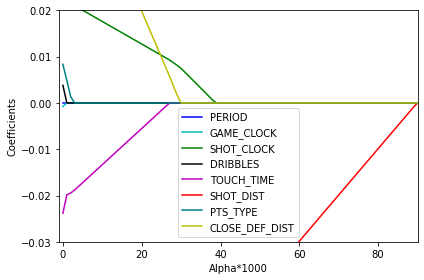

In [6]:
max_alpha = 0.1
coef_ = np.zeros((100,8))


for a in range(100):
    lr_rg = Lasso(alpha=a*0.001+0.001)
    lr_rg.fit(X_train, y_train)

    y_train_pred = lr_rg.predict(X_train)
    y_valid_pred = lr_rg.predict(X_valid)
    coef_[a,:] = lr_rg.coef_.reshape(1,-1)
    alpha=a*0.001+0.001
    if(a%20==0 or a==9): 
        print('[alpha=%.3f]'%alpha)
        print(coef_[a,:],'\n')
    
plt.hlines(y=0, xmin=0, xmax=max_alpha, color='#808000', linewidth = 2, linestyle = '--')


color = ['b','c','g','k','m','r','#008080','y']
for i in range(8):
    plt.plot(range(100),coef_[:,i],color=color[i],label=columns[i])
    
plt.ylabel('Coefficients')
plt.xlabel('Alpha*1000')
plt.xlim(-1,90)
plt.ylim(-0.03,0.02)
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

<span style="color:blue"> <font size="4"> **↑Select SHOT_DIST , SHOT_CLOCK and CLOSE_DEF_DIST as top-3 features↑**<br>**, which converge to zero the latest with incremental α**</font></span><br><br>

<font size='5'>**↓LASSO for Feature Selection↓**</font><br>

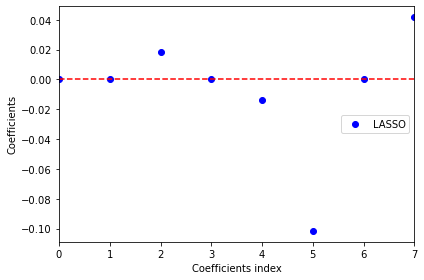

Selected attributes: ['SHOT_CLOCK' 'SHOT_DIST' 'CLOSE_DEF_DIST']


In [7]:
lr_lasso = Lasso(alpha = 0.01)
lr_lasso.fit(X_train, y_train)

plt.scatter(range(8),lr_lasso.coef_, label = 'LASSO', color = 'blue')
plt.hlines(y=0, xmin=0, xmax=7, color='red', linestyle ='--')
plt.xlim(0,7)
plt.legend(loc = 'right')
plt.xlabel('Coefficients index')
plt.ylabel('Coefficients')
plt.tight_layout()
plt.show()


epsilon = 0.015
idxs = np.where(abs(lr_lasso.coef_) > epsilon)
print('Selected attributes: {}'.format(columns.values[idxs]))

<span style="color:blue"> <font size="4"> **↑Also suggests SHOT_DIST , SHOT_CLOCK and CLOSE_DEF_DIST as top-3 features↑**</font></span>

In [8]:
X_train_ = [X_train[..., 2],X_train[..., 5],X_train[..., 7],]
X_train_ = np.asarray(X_train_)
X_train_= X_train_.T
#print(X_train_.shape)


X_valid_ = [X_valid[..., 2],X_valid[..., 5],X_valid[..., 7]]
X_valid_ = np.asarray(X_valid_)
X_valid_= X_valid_.T
#print(X_valid_.shape)


X_test_ = [X_test_std[..., 2],X_test_std[..., 5],X_test_std[..., 7]]
X_test_ = np.asarray(X_test_)
X_test_ = X_test_.T
#print(X_test_.shape)

y_valid = np.squeeze(y_valid)

<font size='5'>**↓Try out the top-3 features for LASSO, α= 0.010 is still the best↓<br>but the misclassified#(10159) is a bit worse than 8-features LASSO(=10131)**</font>

In [9]:
from sklearn.metrics import accuracy_score
for a in [0.001, 0.01,0.1, 1, 10]:
    lr_rg = Lasso(alpha=a)
    lr_rg.fit(X_train_, y_train)
    lr_rg.fit(X_valid_, y_valid)

    y_train_pred = lr_rg.predict(X_train_).round()
    y_valid_pred = lr_rg.predict(X_valid_).round()
    y_pred = lr_rg.predict(X_test_).round()

    print('[alpha= %.3f]'% a)
    print('Misclassified samples: %d' % (y_valid != y_valid_pred).sum())
    print('Accuracy: %.2f\n' % accuracy_score(y_valid, y_valid_pred))

[alpha= 0.001]
Misclassified samples: 10211
Accuracy: 0.60

[alpha= 0.010]
Misclassified samples: 10159
Accuracy: 0.61

[alpha= 0.100]
Misclassified samples: 11797
Accuracy: 0.54

[alpha= 1.000]
Misclassified samples: 11797
Accuracy: 0.54

[alpha= 10.000]
Misclassified samples: 11797
Accuracy: 0.54



<span style="color:blue"> <font size="5"> **↓BEST MODEL SO FAR↓**</font></span><br>
<span style="color:blue"> <font size="5"> **Use LASSO, pick α=0.01, use all 8 features and save the y_pred.csv**</font></span>

In [10]:
lr_rg = Lasso(alpha=0.01)
lr_rg.fit(X_train, y_train)
lr_rg.fit(X_valid, y_valid)

y_train_pred = lr_rg.predict(X_train).round()
y_valid_pred = lr_rg.predict(X_valid).round()
y_pred = lr_rg.predict(X_test).round()

print('[alpha= %.3f]'% a)
print('Misclassified samples: %d' % (y_valid != y_valid_pred).sum())
print('Accuracy: %.2f\n' % accuracy_score(y_valid, y_valid_pred))


import numpy as op
op = op.concatenate((['FGM'],y_pred),axis=0)
y_pred = op
import numpy
numpy.savetxt('y_pred.csv', y_pred,fmt='%s')

[alpha= 10.000]
Misclassified samples: 10131
Accuracy: 0.61



[Error Curve] max_alpha = 100/1000=0.1


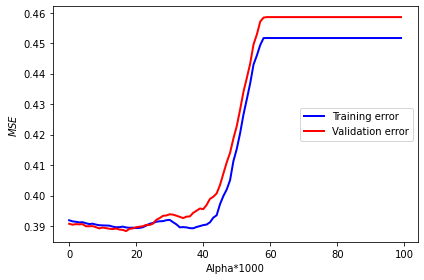

In [11]:
from sklearn.metrics import mean_squared_error

mse_train = []
mse_valid = []

for a in range(100):

    lr_rg = Lasso(alpha=a*0.001+0.001)
    lr_rg.fit(X_train, y_train)

    y_train_pred = lr_rg.predict(X_train).round()
    y_valid_pred = lr_rg.predict(X_valid).round()
    
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_valid.append(mean_squared_error(y_valid, y_valid_pred))
    
print('[Error Curve] max_alpha = 100/1000=0.1')
plt.plot(range(100), mse_train, label = 'Training error  ', color = 'blue', linewidth = 2)
plt.plot(range(100), mse_valid, label = 'Validation error', color = 'red', linewidth = 2)
plt.legend(loc='right')
plt.xlabel('Alpha*1000')
plt.ylabel('$MSE$')
plt.tight_layout()
plt.show()

<font size='4'>**As α=0.01, it is NOT an overfit for validation error is still decreasing.<br>However, when α goes beyond ~0.02, it starts becoming an overfit.**</font><br>

<font size='5'>**--------Report--------**</font><br>
<font size='3'>
    1. Standardize the training and test data<br>
    2. Split training data into training / validation data<br>
    3. Use all training data with 8 features to run LASSO with different α and round the prediction<br>
    4. Find out when α is 0.01, LASSO gives the best accuracy(0.61)<br>
    5. Try out the Weight Decay method with incremental α and found top-3 features(SHOT_DIST, SHOT_CLOCK and CLOSE_DEF_DIST)<br>
    6. Try out LASSO for Feature Selection introduced in the lab guide and also suggests the same top-3 feautures<br>
    7. Try use the top-three features to run LASSO again with different α<br>
    8. Still α=0.01 gives the best accurcy(0.61) but with a lit larger misclassified#, 10159 vs. 10131 with 8 features<br>
    9. Choose 8 feautures with LASSO and α=0.01 as the best approach and output y_pred.csv<br>
    10. Draw the error curves with MSE vs. α and it tells us that the result is not an overfit when α=0.01<br>
    

<font size='5'>**--------Q&A--------**</font><br>
<font size='4'>Q1:How you evaluate your model.</font><br>
By checking the misclassified# and thus the accuracy<br>

<font size='4'>Q2:All models you have tried and the corresponding results.</font><br>
As shown above, LASSO with different α and Weight Decay and Feature Selection. and LASSO with different features<br>

<font size='4'>Q3:Plot the error curve of your best model and tell if it is over-fit or not.</font><br>
As shown above the plot and it is not an overfit when α=0.01<br>

<font size='4'>Q4:The top-3 features you find and how you find it</font><br>
As shown above, they are SHOT_DIST , SHOT_CLOCK and CLOSE_DEF_DIST found by LASSO weight decay method and LASSO for Feature Selection introduced in the lab guide<br>

<font size='4'>Q5:A brief report what you do in this assignment.</font><br>
As shown above the report<br>